<a href="https://colab.research.google.com/github/kouliki/celebal_task11/blob/main/Celebal_Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



### Load CIFAR-10 dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)


### Build Model:

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001), # Change 'lr' to 'learning_rate'
              metrics=['accuracy'])

### Train Model:

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.3022 - loss: 1.8608 - val_accuracy: 0.5382 - val_loss: 1.3048
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.5490 - loss: 1.2539 - val_accuracy: 0.6124 - val_loss: 1.0825
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.6274 - loss: 1.0537 - val_accuracy: 0.6518 - val_loss: 0.9874
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.6740 - loss: 0.9350 - val_accuracy: 0.6834 - val_loss: 0.9107
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.7028 - loss: 0.8532 - val_accuracy: 0.6684 - val_loss: 0.9420
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.7295 - loss: 0.7674 - val_accuracy: 0.7106 - val_loss: 0.8414
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 107ms/step - accuracy: 0.7448 - loss: 0.7280 - val_accuracy: 0.7110 - val_loss: 0.8413
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 103ms/step - accuracy: 0.7581 - loss: 

### Evaluate Model:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

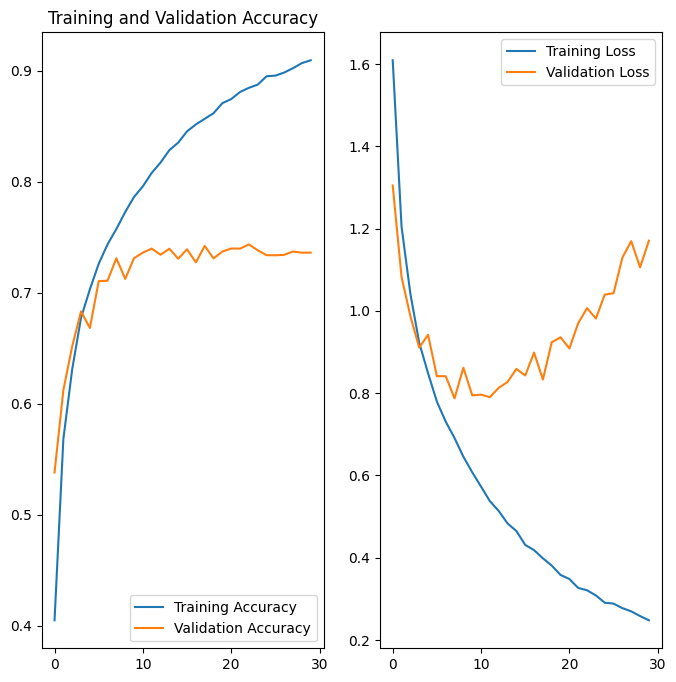

In [6]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt

### Save Model:

In [7]:
model.save('cifar10_classification_model.h5')

### Load and use Model:

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('cifar10_classification_model.h5')


img_tensor=x_val[0:1]
prediction=model.predict(img_tensor)
print('prediction:',prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
prediction: [[3.8672696e-10 6.2572236e-10 6.7687694e-10 8.6289245e-01 1.9233887e-11
  1.3706128e-01 4.6184570e-05 2.2764348e-11 5.3128129e-08 2.0099988e-09]]


### Example Predictions:

In [11]:
def plot_image_predictions(images,true_labels,predictions,class_names):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"True:{class_names[np.argmax(true_labels[i])]},Pred:{class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
  plt.show()

  class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  predictions=model.predict(x_val[:9])
  plot_image_predictions(x_val[0:9],y_val[0:9],prediction,class_names)

### Part2 :-

### 1. setting up Google Colab

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import os
import random

### Load the CIFAR-10 Dataset:

In [14]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")

Training data shape: (50000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)


### Plotting Histograms for RGB channels

In [15]:
def plot_histogram(image):
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  r,g,b=cv2.split(image_rgb)

  hist_r=cv2.calcHist([r],[0],None,[256],[0,256])
  hist_g=cv2.calcHist([g],[0],None,[256],[0,256])
  hist_b=cv2.calcHist([b],[0],None,[256],[0,256])


  plt.figure(figsize=(10,5))
  plt.subplot(1,3,1)
  plt.plot(hist_r,color='red')
  plt.title('Red Channel Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')

  plt.subplot(1,3,2)
  plt.plot(hist_g,color='green')
  plt.title('Green Channel Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')

  plt.subplot(1,3,3)
  plt.plot(hist_b,color='blue')
  plt.title('Blue Channel Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

### Select and Plot Histograms for sample images from the dataset

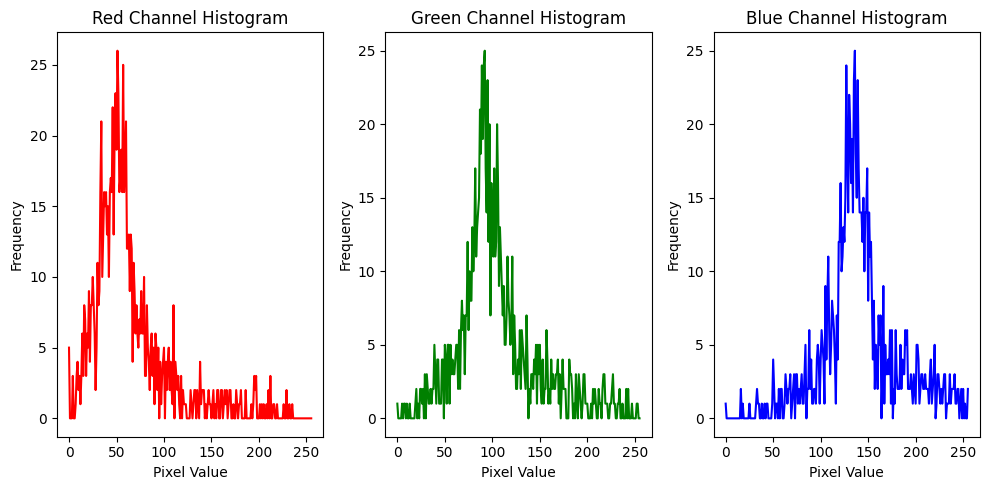

In [16]:
sample_image=x_train[0]

sample_image_uint8 = (sample_image * 255).astype(np.uint8)
plot_histogram(sample_image_uint8)

### Function to Plot Multiple Sample Images with Their Histograms:

<Figure size 640x480 with 0 Axes>

<ipython-input-18-1d6e8a77ce48>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_samples,4,i*4+2)


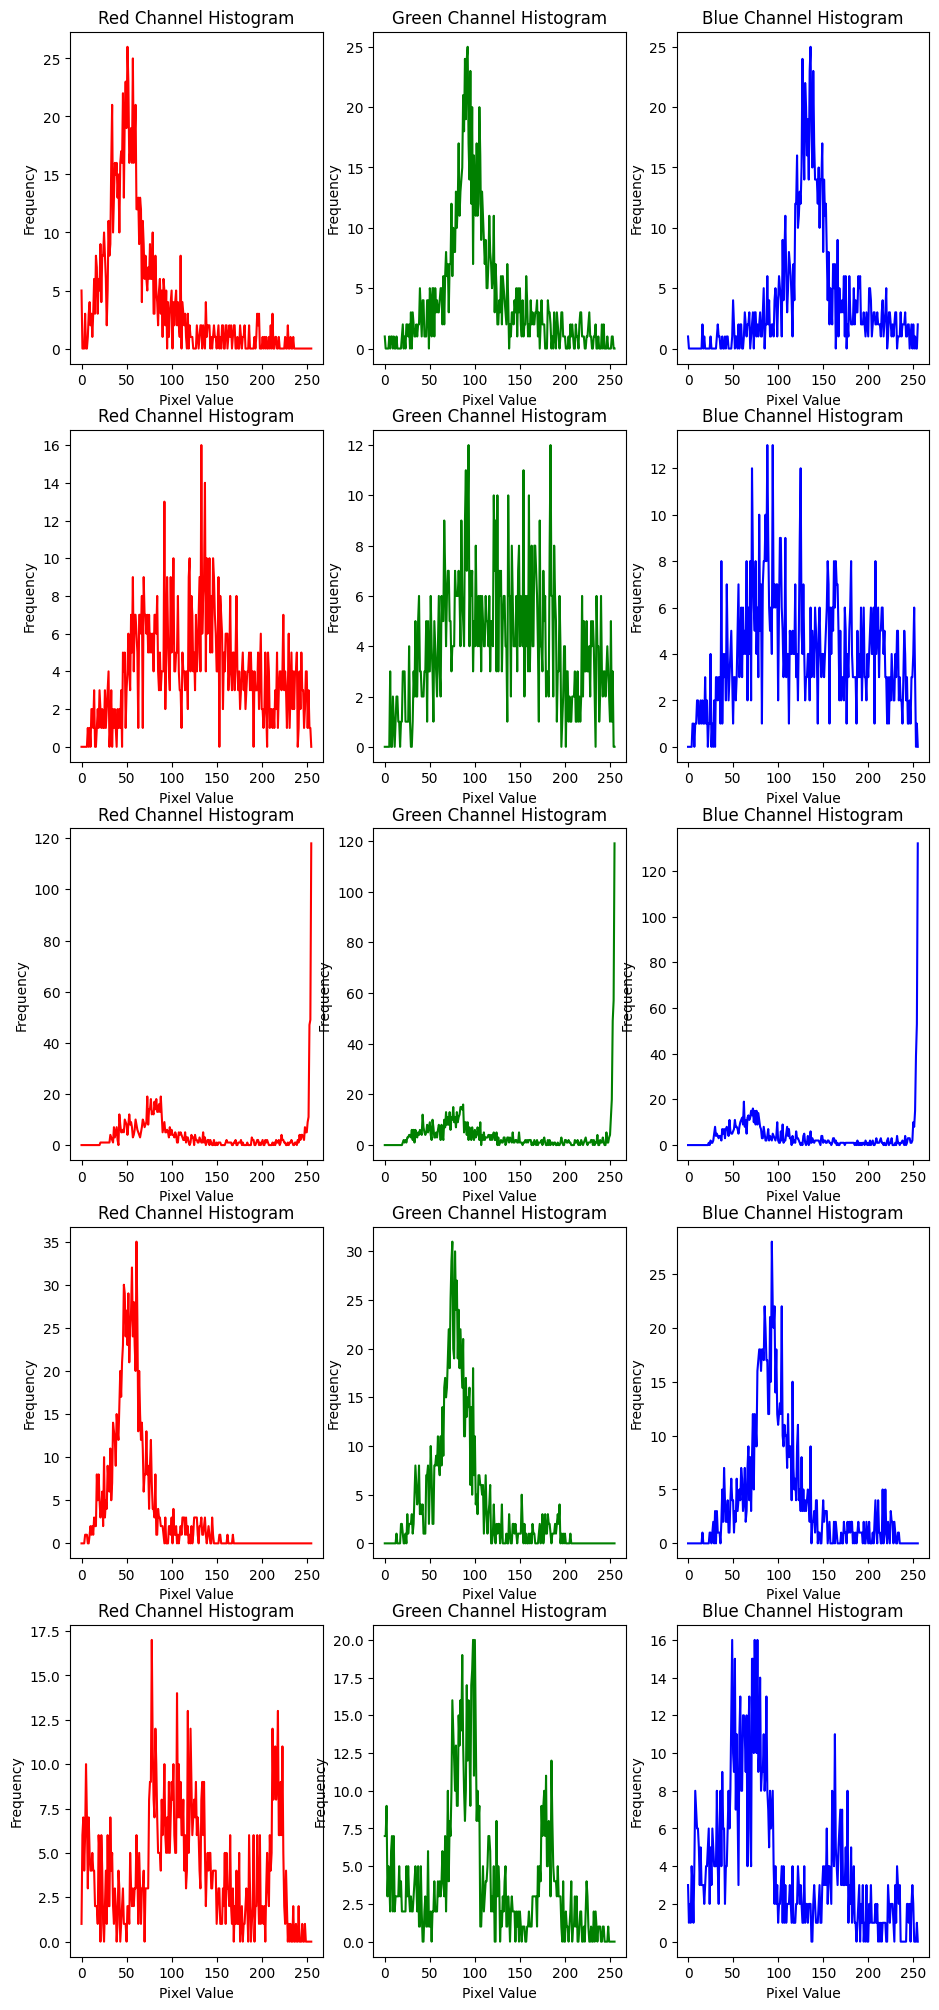

In [18]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_images_with_histograms(images,num_samples=5):
  plt.figure(figsize=(15,num_samples*5))
  for i in range(num_samples):
    image=images[i]
    image_uint8=(image*255).astype(np.uint8)

    plt.subplot(num_samples,2,2*i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {i+1}")

    plt.subplot(num_samples,4,i*4+2)
    r,g,b=cv2.split(cv2.cvtColor(image_uint8,cv2.COLOR_BGR2RGB))
    plt.plot(cv2.calcHist([r],[0],None,[256],[0,256]),color='red')
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(num_samples,4,i*4+3)
    # Use cv2 instead of cv
    plt.plot(cv2.calcHist([g],[0],None,[256],[0,256]),color='green')
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(num_samples,4,i*4+4)
    plt.plot(cv2.calcHist([b],[0],None,[256],[0,256]),color='blue')
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plot_sample_images_with_histograms(x_train,num_samples=5)